## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

## Load Dataset

In [2]:
background = cv2.imread('cat_pattern.png')
background_gray = cv2.cvtColor(background,cv2.COLOR_BGR2GRAY)

template = cv2.imread('cat_paw.png')
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

## Template Matching

paw count :  60


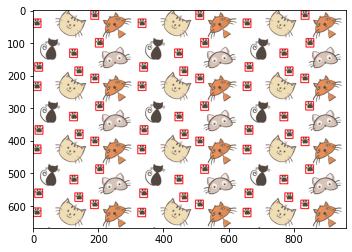

In [3]:
w, h = template.shape[:2]

res = cv2.matchTemplate(background_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8

(y_pt,x_pt) = np.where(res >= threshold)
boxes = list()

for (x,y) in zip(x_pt,y_pt):
    boxes.append((x, y, x+w, y+h))

boxes = non_max_suppression(np.array(boxes))
for (x1,y1,x2,y2) in boxes :
    cv2.rectangle(background, (x1,y1), (x2,y2), (0,0,255), 2)
    
plt.imshow(cv2.cvtColor(background,cv2.COLOR_BGR2RGB))
print("paw count : ",len(boxes))